In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pybaseball import statcast, statcast_batter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Collect Statcast Data (Choose a Season and Batters)
print("Fetching Statcast batted ball data...")
start_date = '2023-04-30'
end_date = '2024-10-30'
batted_ball_data = statcast(start_dt=start_date, end_dt=end_date)

# Preview dataset
print(batted_ball_data.head())

Fetching Statcast batted ball data...
This is a large query, it may take a moment to complete
Skipping offseason dates


100%|█████████████████████████████████████████| 430/430 [00:21<00:00, 20.02it/s]
/Applications/anaconda3/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


    pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
164         KC 2024-10-30           77.5          -1.11           5.65   
177         KC 2024-10-30           78.7          -1.01           5.73   
186         FC 2024-10-30           93.1          -1.19           5.53   
187         KC 2024-10-30           78.5          -1.19            5.7   
199         KC 2024-10-30           77.4          -1.23           5.78   

         player_name  batter  pitcher     events              description  \
164  Buehler, Walker  657077   621111  strikeout  swinging_strike_blocked   
177  Buehler, Walker  657077   621111       None          swinging_strike   
186  Buehler, Walker  657077   621111       None          swinging_strike   
187  Buehler, Walker  657077   621111       None                     ball   
199  Buehler, Walker  669224   621111  strikeout          swinging_strike   

     ...  n_thruorder_pitcher  n_priorpa_thisgame_player_at_bat  \
164  ...                 

In [6]:
# Filter Relevant Columns
print("Filtering necessary columns...")
df = batted_ball_data[['launch_angle', 'launch_speed', 'events']].dropna()

# Convert Outcomes into Binary (HR vs. Other)
df['is_home_run'] = df['events'].apply(lambda x: 1 if x == 'home_run' else 0)

Filtering necessary columns...


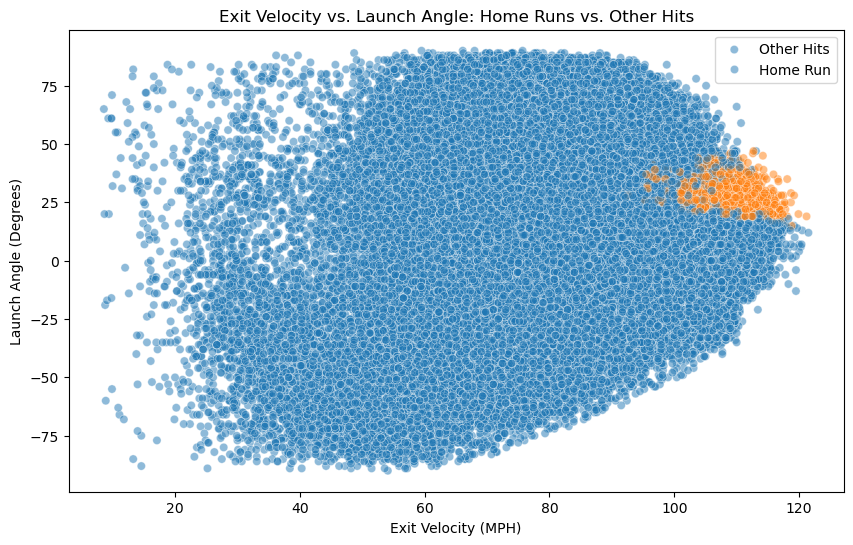

In [8]:
# Visualize Exit Velocity vs. Launch Angle (Home Runs vs. Other Hits)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='launch_speed', y='launch_angle', hue='is_home_run', alpha=0.5)
plt.xlabel("Exit Velocity (MPH)")
plt.ylabel("Launch Angle (Degrees)")
plt.title("Exit Velocity vs. Launch Angle: Home Runs vs. Other Hits")
plt.legend(['Other Hits', 'Home Run'])
plt.show()

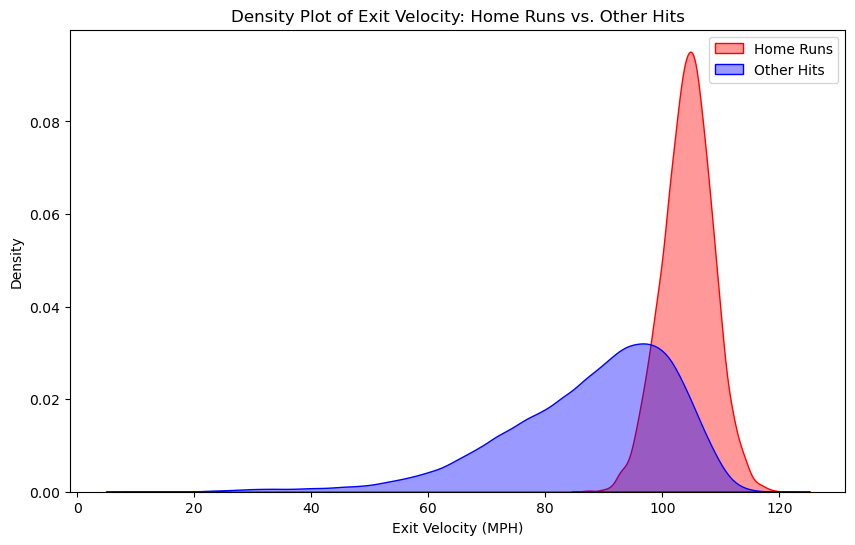

In [10]:
# KDE Plot to Show HR Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['is_home_run'] == 1]['launch_speed'], label="Home Runs", fill=True, color="red", alpha=0.4)
sns.kdeplot(df[df['is_home_run'] == 0]['launch_speed'], label="Other Hits", fill=True, color="blue", alpha=0.4)
plt.xlabel("Exit Velocity (MPH)")
plt.title("Density Plot of Exit Velocity: Home Runs vs. Other Hits")
plt.legend()
plt.show()

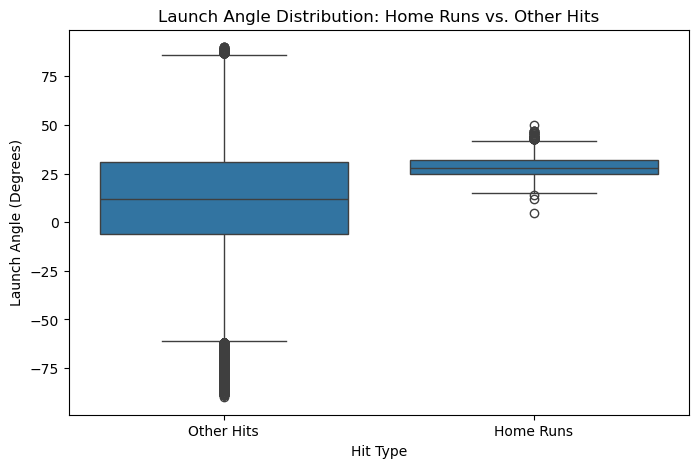

In [12]:
# Boxplot of Launch Angles
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_home_run', y='launch_angle')
plt.xticks([0, 1], ["Other Hits", "Home Runs"])
plt.xlabel("Hit Type")
plt.ylabel("Launch Angle (Degrees)")
plt.title("Launch Angle Distribution: Home Runs vs. Other Hits")
plt.show()

In [14]:
# Train a Classification Model to Predict Home Runs
print("Training a classification model...")

# Select Features (Exit Velocity & Launch Angle)
X = df[['launch_speed', 'launch_angle']]
y = df['is_home_run']

Training a classification model...


In [16]:
# Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9711503632838301

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     44797
           1       0.71      0.62      0.66      2136

    accuracy                           0.97     46933
   macro avg       0.85      0.80      0.82     46933
weighted avg       0.97      0.97      0.97     46933



In [ ]:
# Interactive Prediction Function
def predict_home_run():
    velocity = float(input("Enter Exit Velocity (MPH): "))
    angle = float(input("Enter Launch Angle (Degrees): "))
    prediction = model.predict([[velocity, angle]])
    result = "Home Run" if prediction[0] == 1 else "Not a Home Run"
    print(f"Prediction: {result}")

# Test Interactive Prediction
predict_home_run()